In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


In [2]:
sns.set_style("whitegrid")
pd.set_option("display.max_columns", None)

In [3]:
df_customers = pd.read_csv("/kaggle/input/zeotap-assignment-files/Customers.csv")
df_products = pd.read_csv("/kaggle/input/zeotap-assignment-files/Products.csv")
df_transactions = pd.read_csv("/kaggle/input/zeotap-assignment-files/Transactions.csv")

In [4]:
print(df_customers.head())
print(df_products.head())
print(df_transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [5]:
df_customers.drop_duplicates(subset="CustomerID", inplace=True)
df_products.drop_duplicates(subset="ProductID", inplace=True)
df_transactions.drop_duplicates(subset="TransactionID", inplace=True)

In [6]:
print("\nMissing values per column (Customers):")
print(df_customers.isna().sum())
print("\nMissing values per column (Products):")
print(df_products.isna().sum())
print("\nMissing values per column (Transactions):")
print(df_transactions.isna().sum())


Missing values per column (Customers):
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values per column (Products):
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values per column (Transactions):
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
df_customers['SignupDate'] = pd.to_datetime(df_customers['SignupDate'], errors='coerce')
df_transactions['TransactionDate'] = pd.to_datetime(df_transactions['TransactionDate'], errors='coerce')


In [8]:
df_merged = df_transactions.merge(df_customers, on='CustomerID', how='left')
df_merged = df_merged.merge(df_products, on='ProductID', how='left')

In [9]:
print("\nMerged dataset shape:", df_merged.shape)
print(df_merged.head())


Merged dataset shape: (1000, 13)
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLi

In [10]:
print(df_merged.describe())

                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-07-23 00:00:00   299

In [11]:
df_merged['Month'] = df_merged['TransactionDate'].dt.to_period('M')
monthly_revenue = df_merged.groupby('Month')['TotalValue'].sum().reset_index()

In [12]:
print(monthly_revenue.info())
print(monthly_revenue.head())
print(monthly_revenue['Month'].unique())
print(monthly_revenue['TotalValue'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Month       13 non-null     period[M]
 1   TotalValue  13 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 336.0 bytes
None
     Month  TotalValue
0  2023-12     3769.52
1  2024-01    66376.39
2  2024-02    51459.27
3  2024-03    47828.73
4  2024-04    57519.06
<PeriodArray>
['2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
 '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12']
Length: 13, dtype: period[M]
[ 3769.52 66376.39 51459.27 47828.73 57519.06 64527.74 48771.18 71366.39
 63436.74 70603.75 47063.22 38224.37 59049.2 ]


In [13]:
monthly_revenue

,Month,TotalValue
0,2023-12,3769.52
1,2024-01,66376.39
2,2024-02,51459.27
3,2024-03,47828.73
4,2024-04,57519.06
5,2024-05,64527.74
6,2024-06,48771.18
7,2024-07,71366.39
8,2024-08,63436.74
9,2024-09,70603.75


In [14]:
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


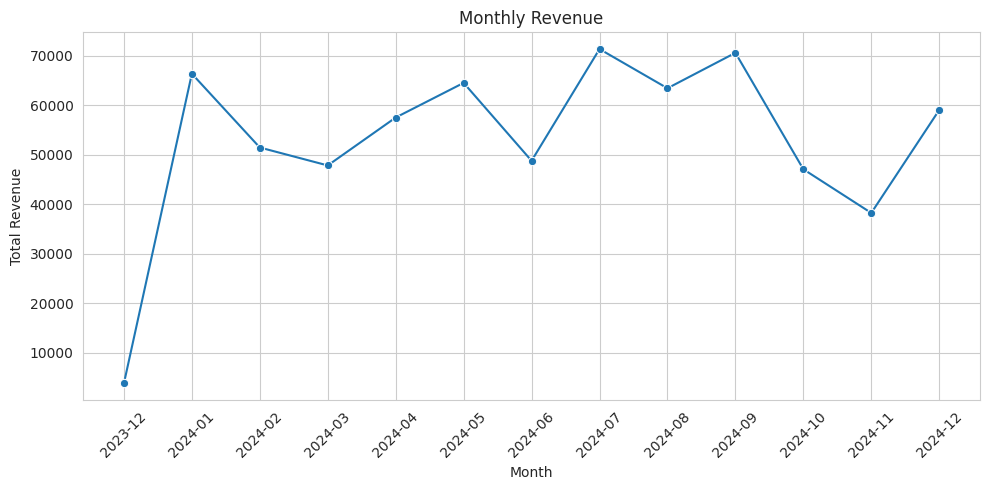

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_revenue, x='Month', y='TotalValue', marker='o')
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
df_merged.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,Month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03


In [17]:
product_revenue = df_merged.groupby('ProductName')['TotalValue'].sum().reset_index()
top_products = product_revenue.sort_values('TotalValue', ascending=False).head(10)

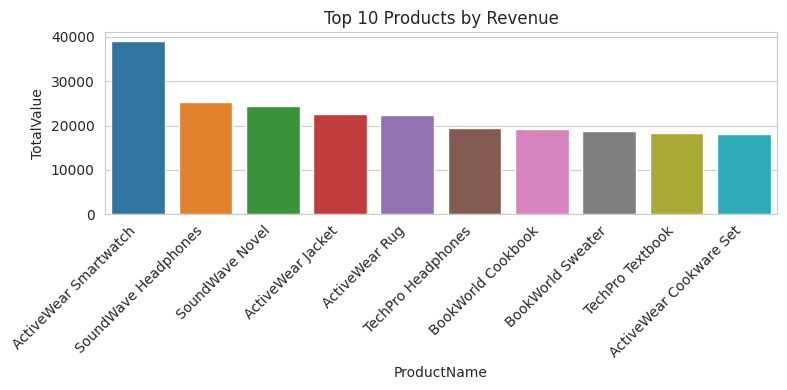

In [18]:
plt.figure(figsize=(8,4))
sns.barplot(data=top_products, x='ProductName', y='TotalValue')
plt.title("Top 10 Products by Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

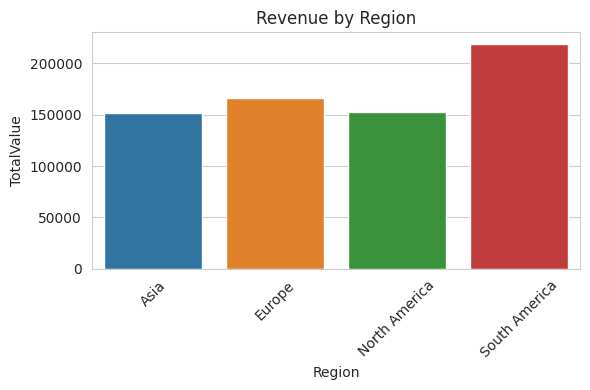

In [19]:
region_revenue = df_merged.groupby('Region')['TotalValue'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=region_revenue, x='Region', y='TotalValue')
plt.title("Revenue by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
customer_spend = df_merged.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spend.columns = ['CustomerID', 'TotalSpend']

In [21]:
avg_spend = customer_spend['TotalSpend'].mean()
print(f"\nAverage spend per customer: {avg_spend:.2f}")


Average spend per customer: 3467.31


In [22]:
top_5_customers = customer_spend.sort_values('TotalSpend', ascending=False).head(5)
print("Top 5 Customers by total spend:")
print(top_5_customers)

Top 5 Customers by total spend:
    CustomerID  TotalSpend
140      C0141    10673.87
53       C0054     8040.39
64       C0065     7663.70
155      C0156     7634.45
81       C0082     7572.91
